## Introduction
In the analysis that follows, the burden or fraction of cost to income is plotted across different income groups, structure types, home values, utility costs, owner/renter assisted, and assisted/not assisted households. The following patterns were noticed:

## Burden Across Time and Income Levels
The median burden increases with decreasing income level for a given year. Only the lowest income group (less than 30 percent of area median income), has burden at the maximum of 10. This group also has the biggest spread in burden values. In general, the spread of burden values increases as income level decreases. Comparing '85 and '13, the median burden increased across all income groups by a factor ranging anywhere between 1.13 and 1.19.

## Structure Types
Regarding structure types, we see that burden tends to be less for single family homes followed by mobile homes. If the household is part of a structure consisting of many units, the the burden tends to rise with the number of units. Comparing 1985 and 2013 data, the burden increases across all structure types.

## Home Values
The spread of home values increases from 1985 to 2013. Also the median home value increases for all income groups roughly by a factor of 3. A 4 percent annual inflation rate over a 28-year period would increase prices by a factor of 3. There is also an overlap in home values among the highest and lowest income group. This suggests a lack of affordable housing?

## Utility Costs
Median utility cost values have increased roughly by a factor of 4 over a 28-year period. Also the spread of utility costs has increased over that same time period across all income groups.

## Burden Change
The lowest income group saw on average a smaller change in burden from 1985 and 2013. For almost 80 percent of this group, the burden has either not changed or decreased. Looking over all income groups, the burden change on average increases with income.

For lowest income group, the median burden decreased by a factor of 2. For the highest income group, the median burden increased by a factor of 1.68. Overall, the median burden increased with income level.

Note that this calculation is based on an inner join of '85 and '13 data. When including all data, the burden increases for all income groups in the time period 1985-2013. This result might just be statistical noise.

## Owners vs. Renters
Owners on average have less burden. The burden has on average increased from 1985 to 2013 for both owners and renters.

## Assisted vs. Not Assisted
Assisted households on average have a higher burden. The burden increased on average for both assisted and not assisted households.

In [272]:
import numpy as np
import pandas as pd
import seaborn as sns
_ = sns.set_style("darkgrid")
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
df85 = pd.read_csv("85_clean.csv", index_col = 'CONTROL')
df87 = pd.read_csv("87_clean.csv", index_col = 'CONTROL')
df89 = pd.read_csv("89_clean.csv", index_col = 'CONTROL')
df91 = pd.read_csv("91_clean.csv", index_col = 'CONTROL')
df93 = pd.read_csv("93_clean.csv", index_col = 'CONTROL')
df95 = pd.read_csv("95_clean.csv", index_col = 'CONTROL')
df97 = pd.read_csv("97_clean.csv", index_col = 'CONTROL')
df99 = pd.read_csv("99_clean.csv", index_col = 'CONTROL')
df01 = pd.read_csv("01_clean.csv", index_col = 'CONTROL')
df03 = pd.read_csv("03_clean.csv", index_col = 'CONTROL')
df05 = pd.read_csv("05_clean.csv", index_col = 'CONTROL')
df07 = pd.read_csv("07_clean.csv", index_col = 'CONTROL')
df09 = pd.read_csv("09_clean.csv", index_col = 'CONTROL')
df11 = pd.read_csv("11_clean.csv", index_col = 'CONTROL')
df13 = pd.read_csv("13_clean.csv", index_col = 'CONTROL')

In [273]:
# define a dictionary of dataframes, the key is the year of dataframe
df_dict = {'1985':df85, '1987':df87, '1989':df89, '1991':df91, '1993':df93, '1995': df95, '1997':df97, '1999':df99,\
          '2001':df01, '2003':df03, '2005':df05, '2007':df07, '2009':df09, '2011':df11, '2013':df13\
          }

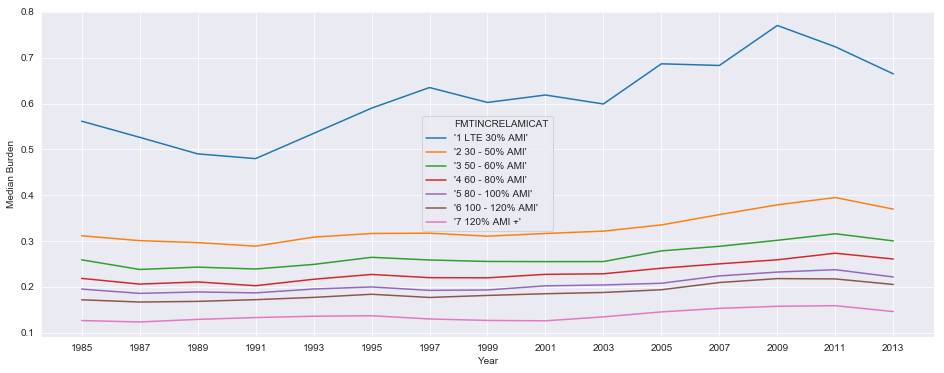

In [274]:
# store median burden for each year in dataframe df_statB, then plot this
df_statB = pd.DataFrame()
for key in df_dict.keys():
    df = df_dict[key]
    df = df.groupby('FMTINCRELAMICAT').median()
    df = df[['BURDEN']]
    df['YEAR'] = key
    df = df.reset_index()
    df_statB = df_statB.append(df)

_ = plt.figure(figsize=(16,6))
_ = sns.lineplot(x = 'YEAR', y = 'BURDEN', hue = 'FMTINCRELAMICAT', data = df_statB)
_ = _.set(xlabel = 'Year', ylabel = 'Median Burden')



The median burden increases with decreasing income level for a given year.

In [275]:
# create a dataframe df that stores all data from 1985 and 2013
df_temp = {}
df = pd.DataFrame()

for year in ['1985','2013']:
    df_temp[year] = df_dict[year]
    # remove any values of '.' in FMTSTRUCTURE TYPE
    df_temp[year] = df_temp[year].loc[~df_temp[year]['FMTSTRUCTURETYPE'].str.contains('.', regex=False),:]
    # remove any NaN values in BURDEN
    df_temp[year] = df_temp[year].loc[~df_temp[year]['BURDEN'].isna(), :]
    # remove index
    df_temp[year] = df_temp[year].reset_index()
    # add a YEAR column
    df_temp[year]['YEAR'] = year
    # append data frame to df
    df = df.append(df_temp[year])

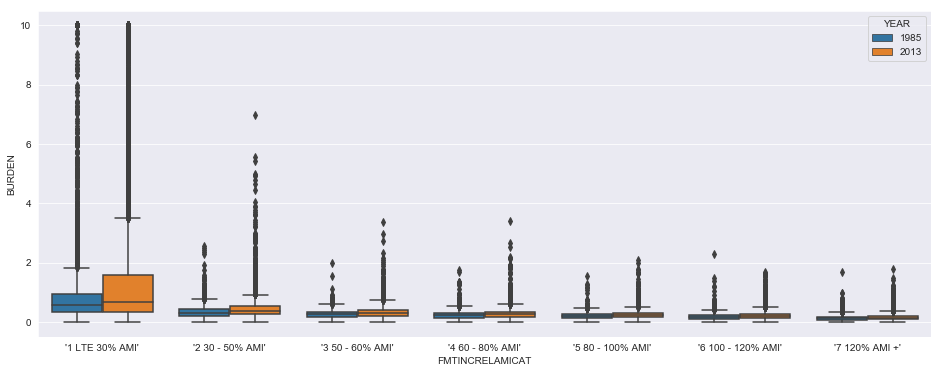

In [276]:
#make box plot for years 1985 and 2013 accross all income groups
income_group_order = ['\'1 LTE 30% AMI\'', '\'2 30 - 50% AMI\'', '\'3 50 - 60% AMI\'', '\'4 60 - 80% AMI\'',\
                      '\'5 80 - 100% AMI\'', '\'6 100 - 120% AMI\'', '\'7 120% AMI +\'']
_ = plt.figure(figsize=(16,6))
_ = sns.boxplot(x = 'FMTINCRELAMICAT', y = 'BURDEN', hue = 'YEAR', order = income_group_order, data = df)

We see that the lowest income group (LTE 30% AMI = less than 30% of area median income) has the biggest spread in burden values. Also this is the only group with burden values at maximum of 10. We can also see that the spread of points outside the whiskers increases as income level decreases.

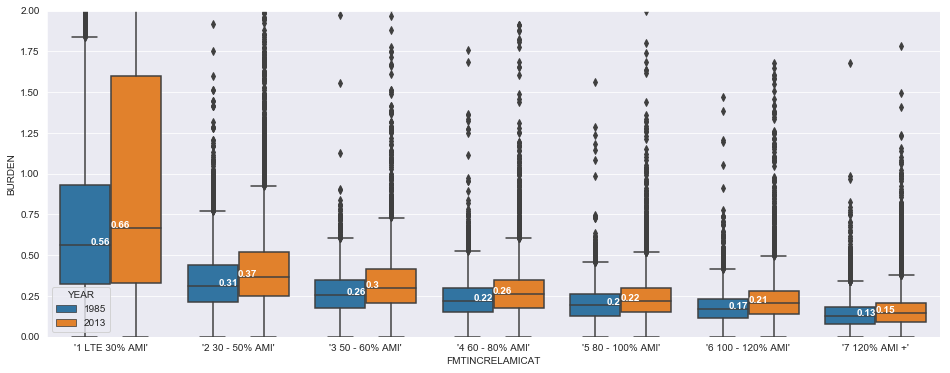

In [277]:
#zoom in to see the box plot better
_ = plt.figure(figsize=(16,6))
_ = plt.ylim(0, 2.0)
ax = sns.boxplot(x = 'FMTINCRELAMICAT', y = 'BURDEN', hue = 'YEAR', order = income_group_order, data = df)

medians = df.groupby(['YEAR', 'FMTINCRELAMICAT'])['BURDEN'].median().values

median_labels = [str(np.round(s, 2)) for s in medians]

xpos = np.arange(7)
ypos = medians


for x, y, label in zip(xpos, ypos[0:7], median_labels[0:7]):
    txt = ax.text(x, y, label, size='medium', color='w', weight='semibold', ha='right',transform=ax.transData)

for x, y, label in zip(xpos, ypos[7:], median_labels[7:]):
    txt = ax.text(x, y, label, size='medium', color='w', weight='semibold', ha='left',transform=ax.transData)

In [278]:
print(medians[7:]/medians[0:7])

[1.18376716 1.18655856 1.15914247 1.19343209 1.13495207 1.19462847
 1.15496581]


In the plot above, we can better see the quartiles accross all income groups. Note that the median burden has increased from 1985 to 2013 for all income groups. The numbers annotated in white text are the median burden values. The median burden has increased in the period 1985-2013 by a factor ranging anywhere from 1.13 to 1.19

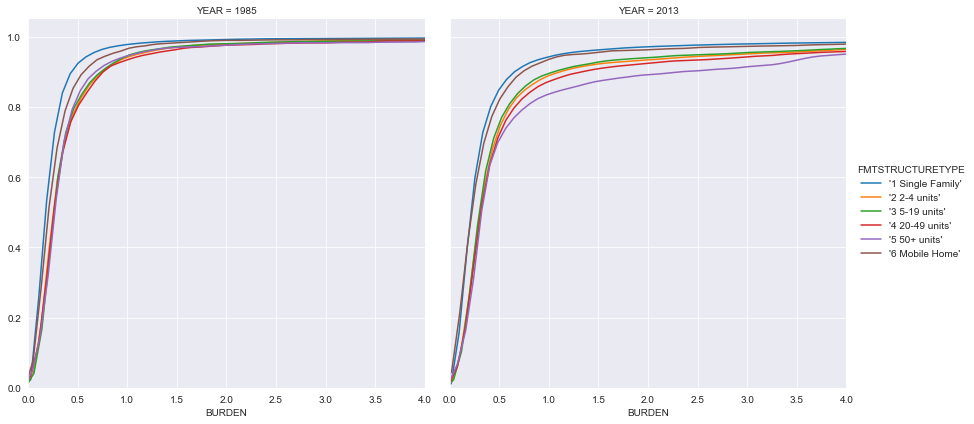

In [279]:
# plot data frame df for BURDEN across different structure types
structure_type_order = ['\'1 Single Family\'', '\'2 2-4 units\'', '\'3 5-19 units\'', '\'4 20-49 units\'',\
                        '\'5 50+ units\'', '\'6 Mobile Home\'']
g = sns.FacetGrid(df, col='YEAR', hue='FMTSTRUCTURETYPE', hue_order=structure_type_order,\
                  height=6, aspect=1)
_ = plt.xlim(0, 4.0)
_ = g.map(sns.kdeplot, 'BURDEN', cumulative=True)
_ = g.add_legend()


We see that burden tends to be less for single family homes followed by mobile homes. If the household is part of a structure consisting of many units, the the burden tends to rise with the number of units. Comparing 1985 and 2013 data, the burden increases across all structure types.

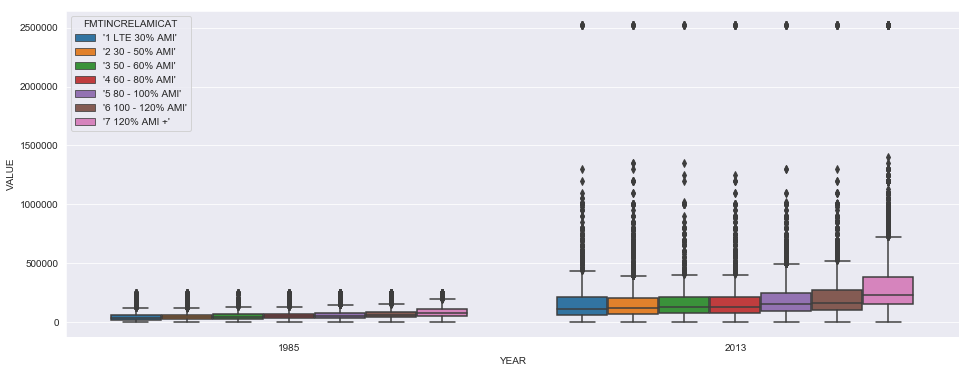

In [280]:
# Plot home values across all income groups for years 1985 and 2013
_ = plt.figure(figsize=(16,6))
_ = sns.boxplot(x = 'YEAR', y = 'VALUE', hue = 'FMTINCRELAMICAT', order = ['1985', '2013'], hue_order = income_group_order,\
                data = df)

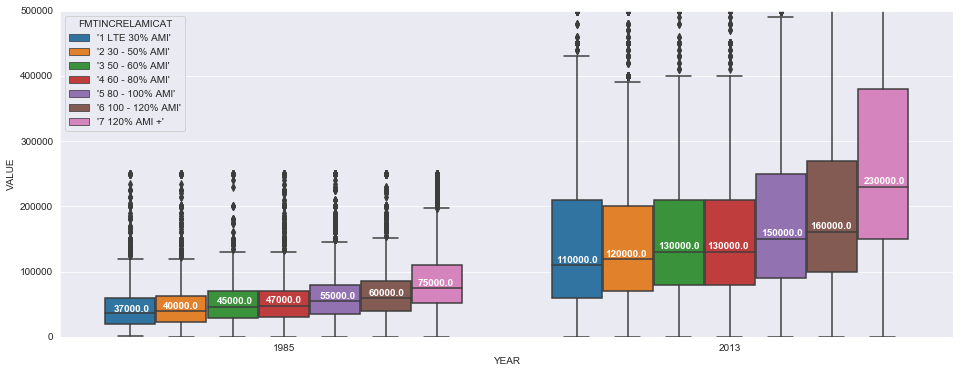

In [281]:
# zoom in to see quartiles better; also add median income annotation
fig   = plt.figure(figsize=(16,6))
ylims = plt.ylim(0, 500000)
ax    = sns.boxplot(x = 'YEAR', y = 'VALUE', hue = 'FMTINCRELAMICAT', order = ['1985', '2013'], hue_order = income_group_order,\
                data = df)

medians = df.groupby(['YEAR', 'FMTINCRELAMICAT'])['VALUE'].median().values

median_labels = [str(np.round(s, 0)) for s in medians]

xpos = np.array([0.06, 0.115, 0.175, 0.23, 0.29, 0.345, 0.4,    0.555, 0.61, 0.67, 0.725, 0.785, 0.84, 0.9])
ypos = np.array([0.075, 0.085, 0.1, 0.105, 0.115, 0.125, 0.155, 0.225, 0.245,  0.27,  0.27,  0.31,  0.33,  0.47])


for x, y, label in zip(xpos, ypos, median_labels):
    txt = ax.text(x, y, label, size='medium', color='w', weight='semibold', transform=ax.transAxes)

The spread of home values increases from 1985 to 2013. Also the median value increases for all income groups roughly by a factor of 3. The median value is annotated for each income group in plot above. A 4 percent annual inflation rate over a 28-year period would increase home values by a factor of 3.

There is also an overlap in home values among the highest and lowest income group. This suggests a lack of affordable housing?

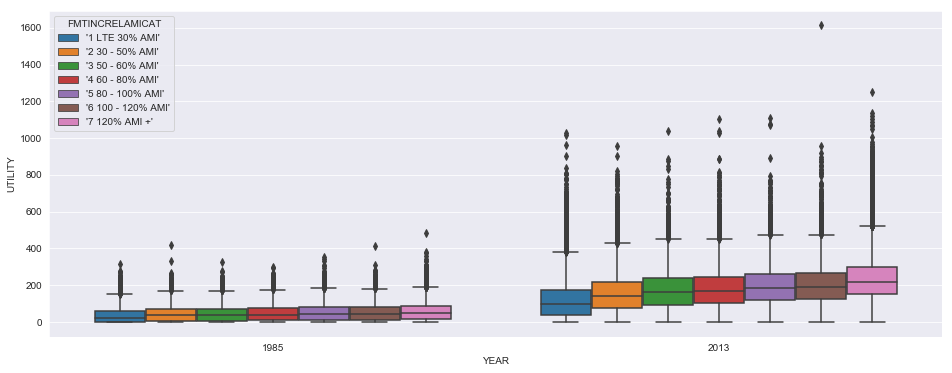

In [282]:
# Plot utility costs across all income groups for years 1985 and 2013
_ = plt.figure(figsize=(16,6))
_ = sns.boxplot(x = 'YEAR', y = 'UTILITY', hue = 'FMTINCRELAMICAT', order = ['1985', '2013'], hue_order = income_group_order,\
                data = df)

medians = df.groupby(['YEAR', 'FMTINCRELAMICAT'])['UTILITY'].median().values

median_labels = [str(np.round(s, 0)) for s in medians]

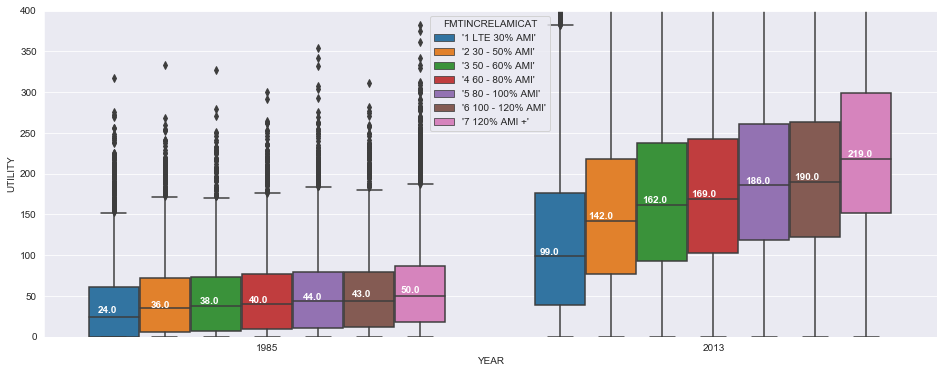

In [283]:
# zoom in to see quartiles better; also add median utility costs annotation
fig   = plt.figure(figsize=(16,6))
ylims = plt.ylim(0, 400)
ax    = sns.boxplot(x = 'YEAR', y = 'UTILITY', hue = 'FMTINCRELAMICAT', order = ['1985', '2013'], \
                    hue_order = income_group_order, data = df)

medians = df.groupby(['YEAR', 'FMTINCRELAMICAT'])['UTILITY'].median().values

median_labels = [str(np.round(s, 0)) for s in medians]

xpos = np.array([0.06, 0.12, 0.175, 0.23, 0.29, 0.345, 0.4,    0.555, 0.61, 0.67, 0.725, 0.785, 0.84, 0.9])
ypos = np.array([0.074, 0.0875, 0.1, 0.105, 0.114, 0.123, 0.135, 0.25, 0.36,  0.41,  0.43,  0.47,  0.48,  0.55])


for x, y, label in zip(xpos, ypos, median_labels):
    txt = ax.text(x, y, label, size='medium', color='w', weight='semibold', transform=ax.transAxes)

Median utility cost values have increased roughly by a factor of 4 over a 28-year period. Also the spread of utility costs has increased over that same time period. The numbers annotated in white denote the median value for utility costs.

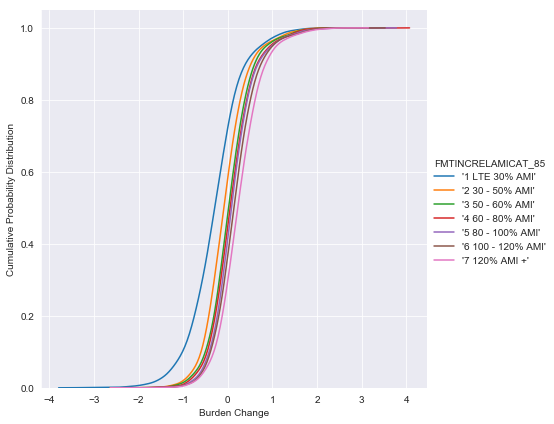

In [284]:
#inner joining '85 and '13 data
df85 = df_dict['1985']
df13 = df_dict['2013']
df_joined = df85.join(df13, lsuffix = '_85', rsuffix = '_13', how = 'inner')
#Removing any burden '85 values equal to zero
df_joined = df_joined.loc[df_joined['BURDEN_85'] != 0]
#Removing any burden '13' values equal to zero
df_joined = df_joined.loc[df_joined['BURDEN_13'] != 0]
#Calculating log fraction of burden 13 to burden 85
df_joined['BURDENCHANGE'] = np.log10(df_joined['BURDEN_13']/df_joined['BURDEN_85'])

#plot cumulative prob distribution of burden change for each income group
g = sns.FacetGrid(df_joined, hue='FMTINCRELAMICAT_85', hue_order=income_group_order,\
                  height=6, aspect=1)
g.map(sns.kdeplot, 'BURDENCHANGE', cumulative=True)
g.set_axis_labels('Burden Change', 'Cumulative Probability Distribution')
g = g.add_legend()

The lowest income group saw on average a smaller change in burden from 1985 and 2013. For almost 80 percent of this group, the burden has either not changed or decreased. Looking over all income groups, the burden change on average increases with income.

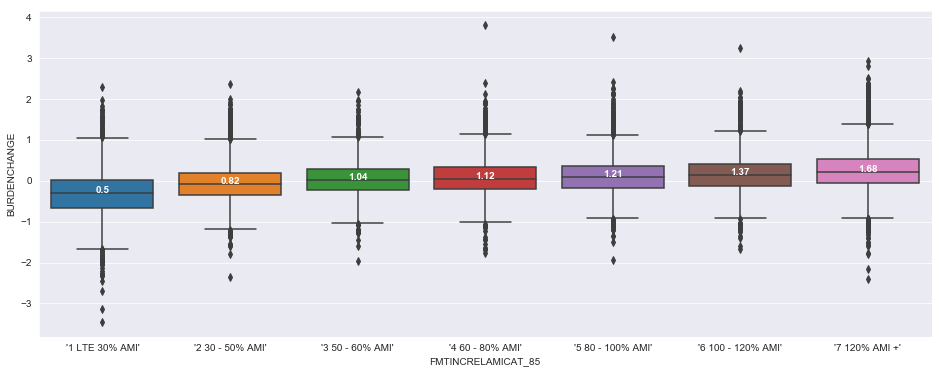

In [285]:
fig   = plt.figure(figsize=(16,6))
#ylims = plt.ylim(0, 400)
ax    = sns.boxplot(y = 'BURDENCHANGE', x = 'FMTINCRELAMICAT_85', order = income_group_order, data = df_joined)

medians = df_joined.groupby(['FMTINCRELAMICAT_85'])['BURDENCHANGE'].median().values

median_labels = [str(np.round(10**s, 2)) for s in medians]

xpos = np.arange(7)
ypos = medians


for x, y, label in zip(xpos, ypos, median_labels):
    txt = ax.text(x, y, label, size='medium', color='w', weight='semibold', ha='center', transform=ax.transData)

The box plot above has been annotated with the median burden change. For lowest income group, the burden decreased by a factor of 2. For the highest income group, the median burden increased by a factor of 1.68. On average, the burden increased with income level.

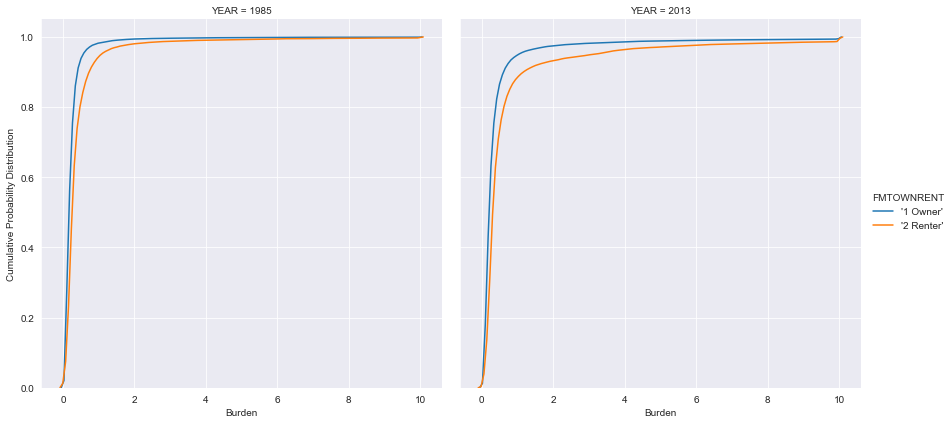

In [286]:
#Plot burden distribution for owners and renters for years '85 and '13'
owner_status_order = ['\'1 Owner\'', '\'2 Renter\'']
g = sns.FacetGrid(df, hue='FMTOWNRENT', hue_order = owner_status_order, col='YEAR', height=6, aspect=1)
g.map(sns.kdeplot, 'BURDEN', cumulative=True)
g.set_axis_labels('Burden', 'Cumulative Probability Distribution')
g = g.add_legend()

As per plot above, owners on average have less burden. The burden has on average increased from 1985 to 2013 for both owners and renters.

In [287]:
print(df.loc[df['YEAR'] == '1985', 'FMTASSISTED'].value_counts())
print(df.loc[df['YEAR'] == '2013', 'FMTASSISTED'].value_counts())

'0 Not Assisted'    38372
'1 Assisted'         2110
Name: FMTASSISTED, dtype: int64
'.'                 35428
'0 Not Assisted'    17198
'1 Assisted'         6262
Name: FMTASSISTED, dtype: int64


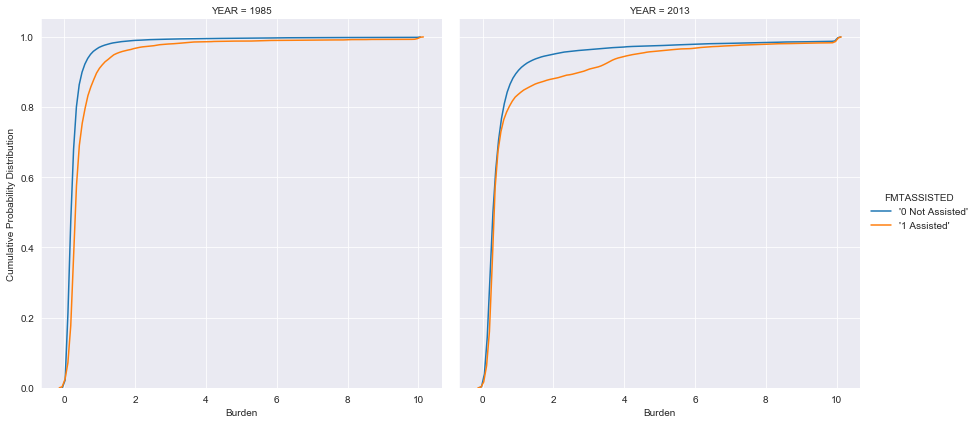

In [288]:
#plot burden distribution for assisted and not assisted groups, in years '85 and '13
#remove any observations of '.' in FMTASSISTED column
g = sns.FacetGrid(df.loc[~df['FMTASSISTED'].str.contains('.', regex=False),:], hue='FMTASSISTED', col='YEAR',\
                  height=6, aspect=1)
g.map(sns.kdeplot, 'BURDEN', cumulative=True)
g.set_axis_labels('Burden', 'Cumulative Probability Distribution')
g = g.add_legend()

Assisted households on average have a higher burden. The burden increased on average for both assisted and not assisted households.